In [31]:
import matplotlib.pyplot as plt
import numpy as np
import gym

In [32]:
env = gym.make("MountainCar-v0")
env.reset()

# define action space
num_actions = env.action_space.n

# define discrete observation space size [20, 20]
dis_obs_space_size = [20] * len(env.observation_space.high)

# define discrete observation win size
dis_obs_space_winsize = (env.observation_space.high-env.observation_space.low)/dis_obs_space_size

# Parameters
learning_rate = 0.2
episodes = 1000 # geändert von 20000
done = False
gamma = 0.95
epsilon = 0.5
start_epsilon_decaying = 1
end_epsilon_decaying = episodes // 2
epsilon_decay_value = epsilon / (end_epsilon_decaying - start_epsilon_decaying)

# Arrays for tracking
reward_list = []
ave_reward_list = []
goal_list=[]
goal = 0
bars = []

# Creating q-table
q_table = np.random.uniform(low=-2, high=0, size=(dis_obs_space_size + [num_actions]))

In [33]:
# Discrete function
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / dis_obs_space_winsize
    return tuple(discrete_state.astype(np.int))

In [34]:
for ep in range(episodes):
    done = False
    tot_reward, reward = 0,0
    discrete_state = get_discrete_state(env.reset())

    while not done:
        if np.random.random() > epsilon:
            # get action from q table
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, num_actions)

        new_state, reward, done, _ = env.step(action)

        new_discrete_state = get_discrete_state(new_state)

        # if training did not end yet after last step - update q table
        if not done:
            # current q value (for current state and performed action)
            current_qval = q_table[discrete_state + (action,)]
            # maximum possible q value in next step (for the new state)
            max_future_qval = np.max(q_table[new_discrete_state])
            # equation for q-learning
            new_qval = current_qval + learning_rate * (reward + gamma * (max_future_qval) - current_qval)
            # Update Q table with new Q value
            q_table[discrete_state+(action,)] = new_qval

        
        elif new_state[0] < env.goal_position:
            print(("Goal NOT reached at {} episode".format(ep)))
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        elif new_state[0] >= env.goal_position:
            print(("Goal reached at {} episode".format(ep)))
            # if goal position is achieved then update Q value
            q_table[discrete_state + (action, )] = 0
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            goal+=1
            
        # track rewards
        reward_list.append(tot_reward)
        tot_reward += reward

        discrete_state = new_discrete_state
    # decaying is beig done every episode if episode number is within decaying range
    if end_epsilon_decaying >= ep >= start_epsilon_decaying:
        epsilon -= epsilon_decay_value

    if (ep+1) % 100 == 0:
        goal_list.append(goal)
        goal=0
        bars.append(str(ep+1))
   
env.close()

Goal NOT reached at 0 episode
Goal NOT reached at 1 episode
Goal NOT reached at 2 episode
Goal NOT reached at 3 episode
Goal NOT reached at 4 episode
Goal NOT reached at 5 episode
Goal NOT reached at 6 episode
Goal NOT reached at 7 episode
Goal NOT reached at 8 episode
Goal NOT reached at 9 episode
Goal NOT reached at 10 episode
Goal NOT reached at 11 episode
Goal NOT reached at 12 episode
Goal NOT reached at 13 episode
Goal NOT reached at 14 episode
Goal NOT reached at 15 episode
Goal NOT reached at 16 episode
Goal NOT reached at 17 episode
Goal NOT reached at 18 episode
Goal NOT reached at 19 episode
Goal NOT reached at 20 episode
Goal NOT reached at 21 episode
Goal NOT reached at 22 episode
Goal NOT reached at 23 episode
Goal NOT reached at 24 episode
Goal NOT reached at 25 episode
Goal NOT reached at 26 episode
Goal NOT reached at 27 episode
Goal NOT reached at 28 episode
Goal NOT reached at 29 episode
Goal NOT reached at 30 episode
Goal NOT reached at 31 episode
Goal NOT reached a

Goal NOT reached at 260 episode
Goal NOT reached at 261 episode
Goal NOT reached at 262 episode
Goal NOT reached at 263 episode
Goal NOT reached at 264 episode
Goal NOT reached at 265 episode
Goal NOT reached at 266 episode
Goal NOT reached at 267 episode
Goal NOT reached at 268 episode
Goal NOT reached at 269 episode
Goal NOT reached at 270 episode
Goal NOT reached at 271 episode
Goal NOT reached at 272 episode
Goal NOT reached at 273 episode
Goal NOT reached at 274 episode
Goal NOT reached at 275 episode
Goal NOT reached at 276 episode
Goal NOT reached at 277 episode
Goal NOT reached at 278 episode
Goal reached at 279 episode
Goal NOT reached at 280 episode
Goal NOT reached at 281 episode
Goal NOT reached at 282 episode
Goal NOT reached at 283 episode
Goal NOT reached at 284 episode
Goal NOT reached at 285 episode
Goal NOT reached at 286 episode
Goal NOT reached at 287 episode
Goal NOT reached at 288 episode
Goal NOT reached at 289 episode
Goal NOT reached at 290 episode
Goal NOT rea

Goal NOT reached at 528 episode
Goal NOT reached at 529 episode
Goal NOT reached at 530 episode
Goal NOT reached at 531 episode
Goal NOT reached at 532 episode
Goal NOT reached at 533 episode
Goal NOT reached at 534 episode
Goal NOT reached at 535 episode
Goal reached at 536 episode
Goal reached at 537 episode
Goal NOT reached at 538 episode
Goal NOT reached at 539 episode
Goal NOT reached at 540 episode
Goal NOT reached at 541 episode
Goal NOT reached at 542 episode
Goal NOT reached at 543 episode
Goal NOT reached at 544 episode
Goal NOT reached at 545 episode
Goal NOT reached at 546 episode
Goal NOT reached at 547 episode
Goal NOT reached at 548 episode
Goal NOT reached at 549 episode
Goal NOT reached at 550 episode
Goal NOT reached at 551 episode
Goal NOT reached at 552 episode
Goal NOT reached at 553 episode
Goal NOT reached at 554 episode
Goal NOT reached at 555 episode
Goal NOT reached at 556 episode
Goal NOT reached at 557 episode
Goal NOT reached at 558 episode
Goal NOT reached

Goal NOT reached at 800 episode
Goal NOT reached at 801 episode
Goal NOT reached at 802 episode
Goal NOT reached at 803 episode
Goal NOT reached at 804 episode
Goal NOT reached at 805 episode
Goal NOT reached at 806 episode
Goal NOT reached at 807 episode
Goal NOT reached at 808 episode
Goal NOT reached at 809 episode
Goal NOT reached at 810 episode
Goal NOT reached at 811 episode
Goal NOT reached at 812 episode
Goal NOT reached at 813 episode
Goal NOT reached at 814 episode
Goal NOT reached at 815 episode
Goal NOT reached at 816 episode
Goal NOT reached at 817 episode
Goal NOT reached at 818 episode
Goal NOT reached at 819 episode
Goal NOT reached at 820 episode
Goal NOT reached at 821 episode
Goal NOT reached at 822 episode
Goal NOT reached at 823 episode
Goal NOT reached at 824 episode
Goal NOT reached at 825 episode
Goal NOT reached at 826 episode
Goal NOT reached at 827 episode
Goal NOT reached at 828 episode
Goal NOT reached at 829 episode
Goal NOT reached at 830 episode
Goal NOT

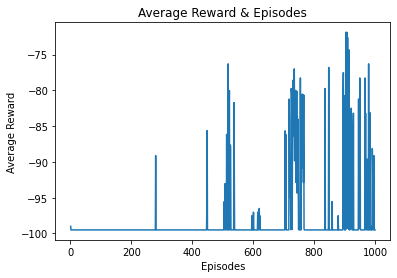

In [35]:
plt.plot((np.arange(len(ave_reward_list)) + 1), ave_reward_list)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward & Episodes')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

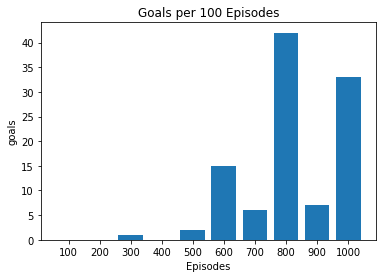

In [38]:
plt.bar(bars,goal_list, width = 0.8)
plt.xlabel("Episodes")
plt.ylabel("goals")
plt.title("Goals per 100 Episodes")
plt.show